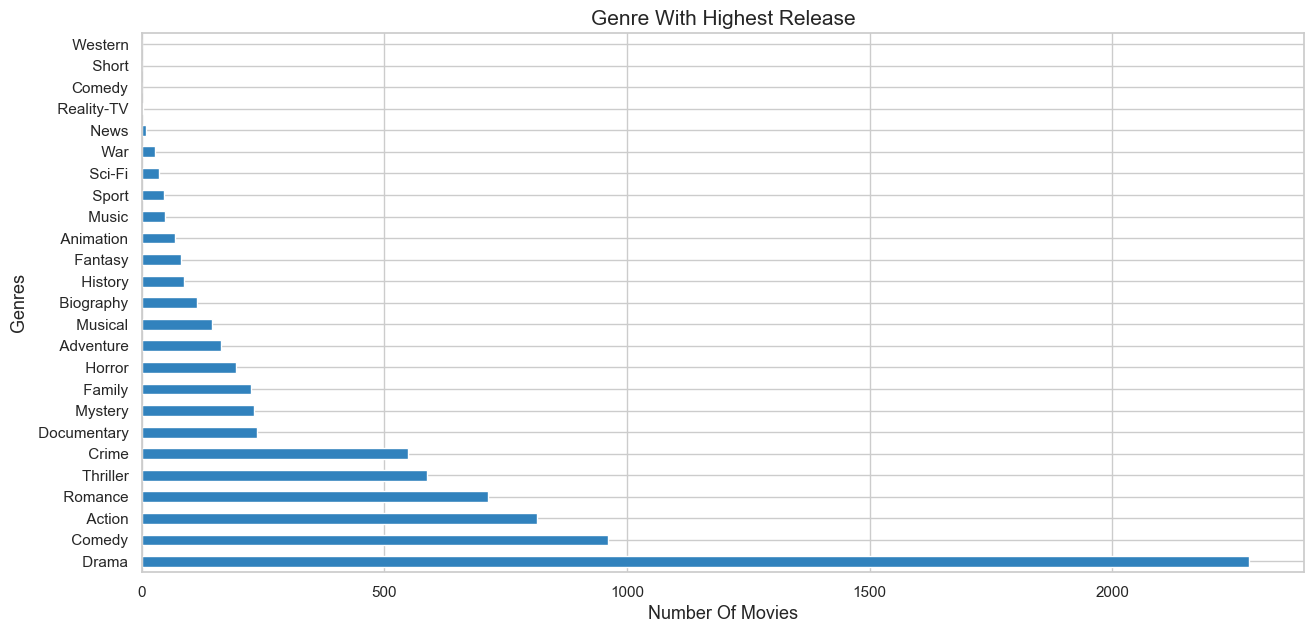

In [57]:

# Import the required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# %matplotlib inline

# Load data
df = pd.read_csv('movies_dataset.csv', encoding='latin-1')

df2 = df.iloc[:6007]
df2=df2.drop_duplicates(subset=['Movie'])
df2 = df2.dropna(subset=['Duration','Genre'])

#make a function will will split the string and return the count of each genre.
def count_genre(x):
    #concatenate all the rows of the genrs.
    data_plot = df2[x].str.cat(sep = ', ')
    data = pd.Series(data_plot.split(','))
    #conts each of the genre and return.
    info = data.value_counts(ascending=False)
    return info

#call the function for counting the movies of each genre.
total_genre_movies = count_genre('Genre')
#plot a 'barh' plot using plot function for 'genre vs number of movies'.
total_genre_movies.plot(kind= 'barh',figsize = (15,7),fontsize=11,colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Genre With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Genres",fontsize= 13)
sns.set_style("whitegrid")

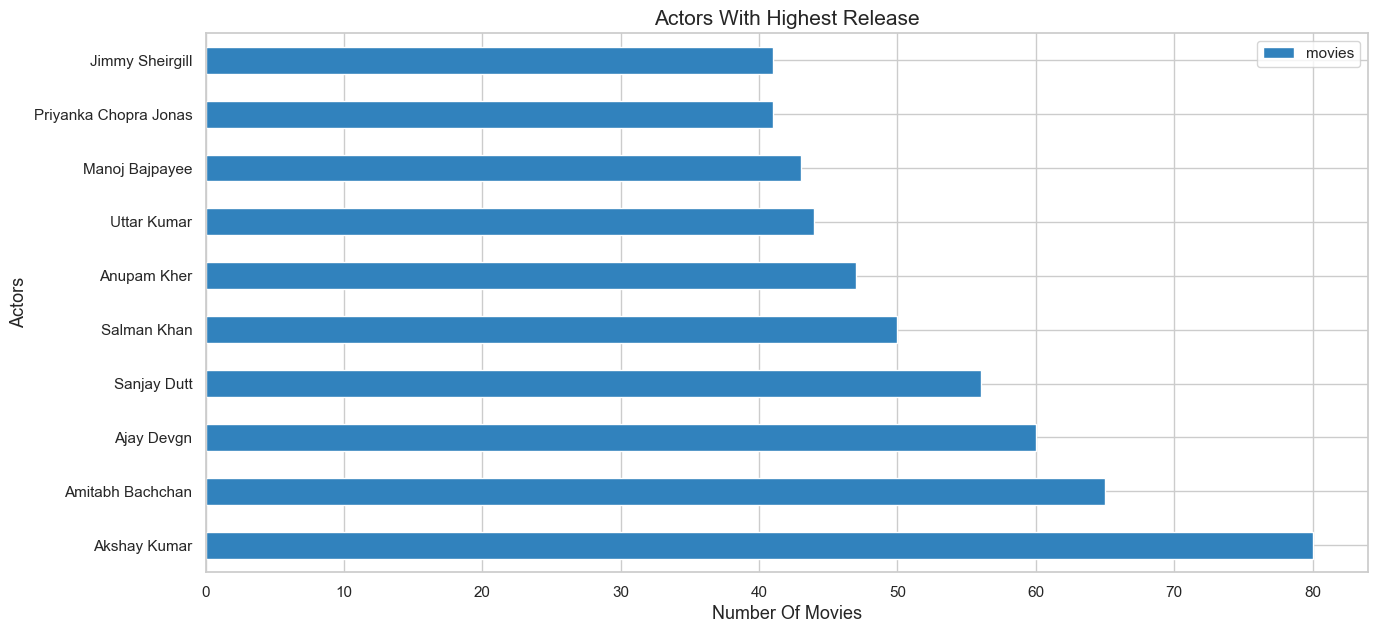

In [58]:
# plot a 'barh' plot using plot function for 'star vs number of movies'
stars = list(df2['Actor_1'].unique()) +list(df2['Actor_2'].unique()) + list(df2['Actor_3'].unique()) + list(df2['Actor_4'].unique())
stars = np.unique(stars)

# calculate count of movies done by each actor.
star_movies = []
for star in stars:
    star_movies.append(len(df2[(df2['Actor_1'] == star) | (df2['Actor_2'] == star) | (df2['Actor_3'] == star) | (df2['Actor_4'] == star)]))

#make a dataframe of stars and their movies.
star_movies = pd.DataFrame({'star': stars, 'movies': star_movies})
#sort the dataframe in descending order of movies.
star_movies = star_movies.sort_values(by='movies', ascending=False)
#reset the index of the dataframe.
star_movies = star_movies.reset_index(drop=True)
#take the top 10 actors.
star_movies = star_movies[:10]
#plot a 'barh' plot using plot function for 'star vs number of movies'.
star_movies.plot(x='star', y='movies', kind='barh', figsize=(15, 7), fontsize=11, colormap='tab20c')

#setup the title and the labels of the plot.
plt.title("Actors With Highest Release",fontsize=15)
plt.xlabel('Number Of Movies',fontsize=13)
plt.ylabel("Actors",fontsize= 13)
sns.set_style("whitegrid")

C:\Users\Anshul\AppData\Local\Temp\ipykernel_35284\3287459845.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby('Years').mean()['Duration'].plot(xticks = np.arange(2000,2022, 5))


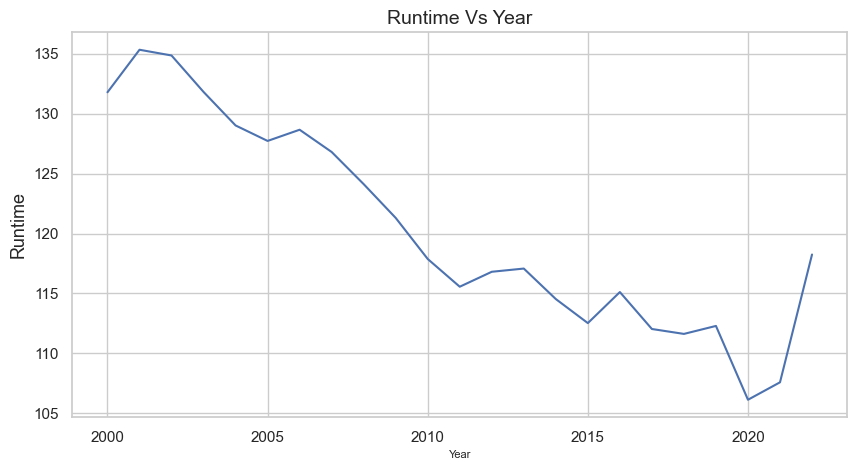

In [59]:
# Movie Runtime vs Year trend line
df2['Duration'] = df2['Duration'].str.replace('min', '').astype(int)
df2.head()
# convert years to int
df2['Years'] = df2['Years'].astype(int)

df2.groupby('Years').mean()['Duration'].plot(xticks = np.arange(2000,2022, 5))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 8)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")

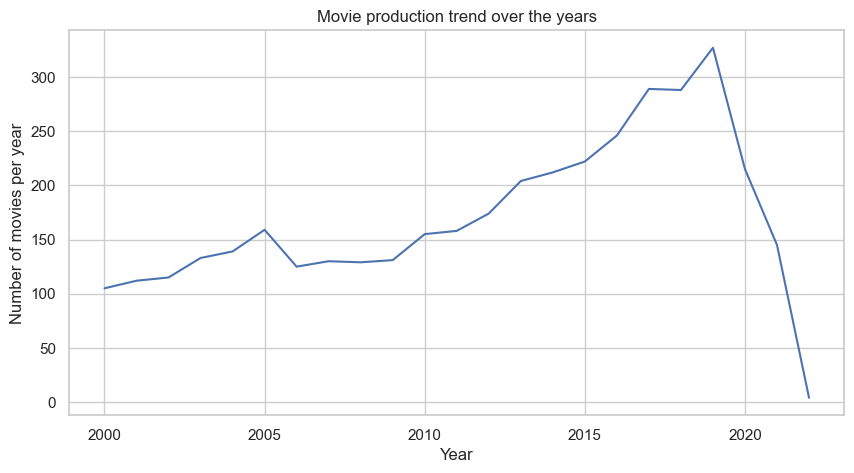

In [60]:
# Number of movies produced each year
movies_per_year= df2['Years'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies per year');